In [2]:
!wget --no-check-certificate \
  http://vcc.tech/file/upload_file//0/58//weboem_informations/classification.zip\
  -O /tmp/classification.zip

--2020-10-06 09:54:08--  http://vcc.tech/file/upload_file//0/58//weboem_informations/classification.zip
Resolving vcc.tech (vcc.tech)... 3.113.233.239
Connecting to vcc.tech (vcc.tech)|3.113.233.239|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://vcc.tech/file/upload_file//0/58//weboem_informations/classification.zip [following]
--2020-10-06 09:54:09--  https://vcc.tech/file/upload_file//0/58//weboem_informations/classification.zip
Connecting to vcc.tech (vcc.tech)|3.113.233.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2002411613 (1.9G) [application/zip]
Saving to: ‘/tmp/classification.zip’

/tmp/classification 100%[===================>]   1.86G  8.43MB/s    in 4m 20s  

2020-10-06 09:58:29 (7.34 MB/s) - ‘/tmp/classification.zip’ saved [2002411613/2002411613]



In [3]:
import zipfile,os
local_zip = '/tmp/classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cuaca')
zip_ref.close()

In [4]:
!rm -rf /tmp/cuaca/weather_classification/cloudy/
!rm -rf /tmp/cuaca/weather_classification/haze//

In [5]:
import os
mypath= '/tmp/cuaca/weather_classification'
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
rainy      10000
snow       10000
sunny      10000
thunder    10000
dtype: int64

In [7]:
df.head()

,path,file_name,tag
0,/tmp/cuaca/weather_classification/thunder/thun...,thunder_08817.jpg,thunder
1,/tmp/cuaca/weather_classification/thunder/thun...,thunder_09808.jpg,thunder
2,/tmp/cuaca/weather_classification/thunder/thun...,thunder_03402.jpg,thunder
3,/tmp/cuaca/weather_classification/thunder/thun...,thunder_00194.jpg,thunder
4,/tmp/cuaca/weather_classification/thunder/thun...,thunder_05526.jpg,thunder


In [8]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [9]:
X= df['path']
y= df['tag']

In [10]:
# split dataset awal menjadi data train dan test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=10)

In [11]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [12]:
print('train size', len(df_tr))
print('val size', len(df_val))

train size 32000
val size 8000


In [13]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_tr,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag    
train       rainy      15956
            snow       16076
            sunny      15980
            thunder    15988
validation  rainy       2022
            snow        1962
            sunny       2010
            thunder     2006
dtype: int64 




,path,tag,set
71306,/tmp/cuaca/weather_classification/thunder/thun...,thunder,validation
39635,/tmp/cuaca/weather_classification/rainy/rainy_...,rainy,train
53445,/tmp/cuaca/weather_classification/rainy/rainy_...,rainy,train


In [14]:
import shutil
from tqdm.notebook import tqdm as tq

In [15]:
datasource_path = "/tmp/cuaca/weather_classification"
dataset_path = "/tmp/cuaca/dataset"

In [16]:
for index, row in tq(df_all.iterrows()):
    
    
    #mendeteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #membuat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #menyalin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [17]:

rainy_dir = os.path.join('/tmp/cuaca/dataset/train/rainy')
snow_dir = os.path.join('/tmp/cuaca/dataset/train/snow')
sunny_dir = os.path.join('/tmp/cuaca/dataset/train/sunny')
thunder_dir = os.path.join('/tmp/cuaca/dataset/train/thunder')


print('total training rainy images:', len(os.listdir(rainy_dir)))
print('total training snow images:', len(os.listdir(snow_dir)))
print('total training sunny images:', len(os.listdir(sunny_dir)))
print('total training thunder images:', len(os.listdir(thunder_dir)))



rainy_files = os.listdir(rainy_dir)
print(rainy_files[:10])

snow_files = os.listdir(snow_dir)
print(snow_files[:10])

sunny_files = os.listdir(sunny_dir)
print(sunny_files[:10])

thunder_files = os.listdir(thunder_dir)
print(thunder_files[:10])

total training rainy images: 7978
total training snow images: 8038
total training sunny images: 7990
total training thunder images: 7994
['rainy_06033.jpg', 'rainy_06139.jpg', 'rainy_09545.jpg', 'rainy_07383.jpg', 'rainy_04329.jpg', 'rainy_01641.jpg', 'rainy_09788.jpg', 'rainy_05605.jpg', 'rainy_03640.jpg', 'rainy_04482.jpg']
['snow_07628.jpg', 'snow_00657.jpg', 'snow_01971.jpg', 'snow_01632.jpg', 'snow_04580.jpg', 'snow_06834.jpg', 'snow_08478.jpg', 'snow_02514.jpg', 'snow_04343.jpg', 'snow_03858.jpg']
['sunny_00400.jpg', 'sunny_06363.jpg', 'sunny_04174.jpg', 'sunny_08038.jpg', 'sunny_04469.jpg', 'sunny_09526.jpg', 'sunny_09919.jpg', 'sunny_06364.jpg', 'sunny_03907.jpg', 'sunny_00168.jpg']
['thunder_09808.jpg', 'thunder_03402.jpg', 'thunder_00194.jpg', 'thunder_05526.jpg', 'thunder_00257.jpg', 'thunder_07701.jpg', 'thunder_03344.jpg', 'thunder_09067.jpg', 'thunder_02974.jpg', 'thunder_07785.jpg']


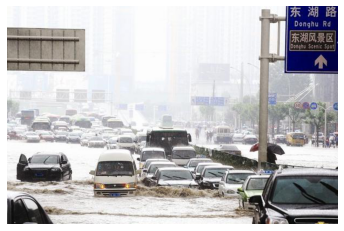

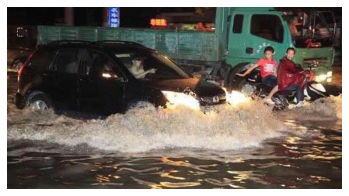

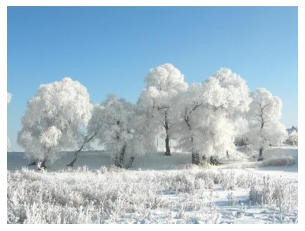

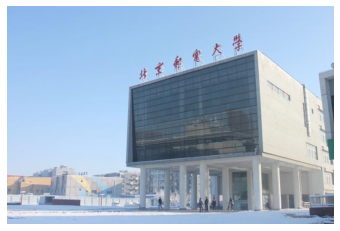

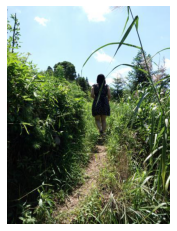

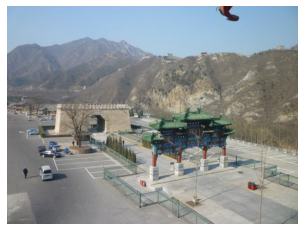

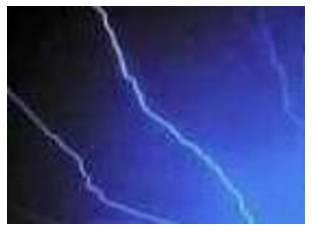

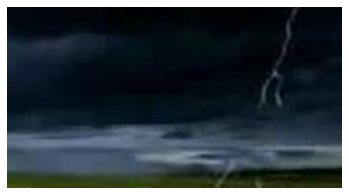

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rainy = [os.path.join(rainy_dir, fname) 
                for fname in rainy_files[pic_index-2:pic_index]]
next_snow = [os.path.join(snow_dir, fname) 
                for fname in snow_files[pic_index-2:pic_index]]
next_sunny = [os.path.join(sunny_dir, fname) 
                for fname in sunny_files[pic_index-2:pic_index]]
next_thunder = [os.path.join(thunder_dir, fname) 
                for fname in thunder_files[pic_index-2:pic_index]]                   

for i, img_path in enumerate(next_rainy+next_snow+next_sunny+next_thunder):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [19]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [20]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

TRAINING_DIR = "/tmp/cuaca/dataset/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/cuaca/dataset/validation/"
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64,64),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(64,64),
	class_mode='categorical',
  batch_size=32
)


model = Sequential()
model.add(InputLayer(input_shape=(64, 64, 3)))


model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))


# ANN block
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(units=4, activation='sigmoid'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=1000, callbacks=[callbacks], validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("cuaca.h5")

Found 32000 images belonging to 4 classes.
Found 8000 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_____________________________________

In [24]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpj7zl33rg/assets


INFO:tensorflow:Assets written to: /tmp/tmpj7zl33rg/assets


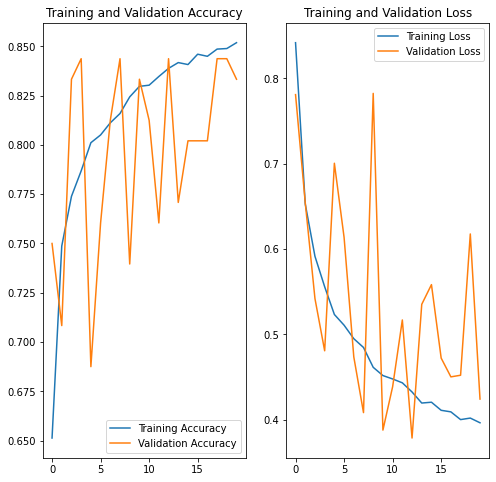

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
labels = ['rainy', 'snow', 'sunny','thunder']

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=6)
  print(fn)
  print( labels[np.argmax(classes)], np.max(classes) )
  print(classes)

Saving sunny.jpg to sunny (1).jpg
Saving Snow.jpg to Snow (2).jpg
Saving Rainy.jpg to Rainy (2).jpg
Saving thunder.jpeg to thunder (2).jpeg
sunny.jpg
sunny 1.0
[[0. 0. 1. 0.]]
Snow.jpg
snow 1.0
[[0. 1. 1. 0.]]
Rainy.jpg
sunny 1.0
[[0. 0. 1. 0.]]
thunder.jpeg
thunder 1.0
[[0. 0. 0. 1.]]
